# **Advance Training AI Center for Learning and Optimization**

### **PreProcessing untuk Analisis Sentiment Twitter Ganjar**
<br/>

Dibuat dan dipaparkan oleh:

<img src="https://ailo.telkomuniversity.ac.id/wp-content/uploads/2023/07/cropped-logo-stempel-ai-center-1-219x60.png" width="200px"/>

© 2023 AI Center for Learning and Optimization

[Instagram](https://www.instagram.com/aicenter.telu/) | [Website](https://ailo.telkomuniversity.ac.id/)
<br/>
<br/>

### SETUP
Dataset yang digunakan ialah hasil crawling dari twitter dengan keyword "Ganjar" dan dilakukan pelabelan secara manual

In [ ]:
# #Install transformers dan sastrawi
# !pip install transformers
# !pip install sastrawi

In [ ]:
# #import library yang dibutuhkan
# import re
# import pandas as pd
# import numpy as np
# import matplotlib as plt

In [ ]:
#import data
df = pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/Ganjar1000aja.csv', sep=',')

### EDA

In [ ]:
#Mendrop data kosong dan melihat dataframe
df = df.dropna()
df

,full_text,class
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",2
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",0
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,2
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",0
4,1 Muharam bersama GANJAR https://t.co/NzIDJZ0AkV,1
...,...,...
989,Masih tentang Haru Biru kepulangan Haji Anies ...,1
990,Ganjar Pranowo adalah sosok yg sederhana dan m...,2
991,"Adian sebut, Presiden Jokowi bilang ke dirinya...",1
992,@ch_chotimah2 @ganjarpranowo Kalau dia hebat.....,2


In [ ]:
#Menyimpan label pada dataframe
df_class = df['class']
#Menghapus data yang tidak dibutuhkan
df = df.drop(['class'], axis=1)
df

,full_text
0,"Soal pertemuan Ganjar dan Airlangga, tertutup...."
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar..."
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres"
4,1 Muharam bersama GANJAR https://t.co/NzIDJZ0AkV
...,...
989,Masih tentang Haru Biru kepulangan Haji Anies ...
990,Ganjar Pranowo adalah sosok yg sederhana dan m...
991,"Adian sebut, Presiden Jokowi bilang ke dirinya..."
992,@ch_chotimah2 @ganjarpranowo Kalau dia hebat.....


In [ ]:
#Melihat info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  994 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


### PRE-PROCESSING
Akan dilakukan pemrosesan data supaya menjadi data yang siap pakai dibantu oleh library sastrawi sebagai stemmer dan stopword dan kamusAlay untuk kata baku

In [126]:
#Import stopword dari sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#Membuat stemmer sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#Membuat stopword sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [127]:
#Membuat kamus kata baku
kata_baku = pd.read_csv('https://drive.google.com/uc?id=1-4tVP2_bGtV1K1StQgavSIUokfSfvOv5')
kata_baku = kata_baku.set_index("kataAlay")["kataBaik"].to_dict()

#Stopword tambahan
stop_words = list(pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/stopwords300.txt', header=None)[0])

In [128]:
#Membuat fungsi untuk melakukan cleaning pada data
def cleaning(text):
    text = str(text)

    # Mengubah setiap kata menjadi lowercase
    text =  text.lower()

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # Menghapus kata stopword dalam tweet dan merubahnya menjadi kata baku
    temp_text_split = []
    final_text = []
    text_split = text.split(' ')

    for i in range(len(text_split)):

        #Merubah kata menjadi kata baku
        if text_split[i] not in stop_words:
              if text_split[i] in kata_baku:
                  text_split[i] = kata_baku[text_split[i]]

              #Menghapus data yang kurang dari 3 karakter
              if len(list(str(text_split[i]))) > 3:
                 temp_text_split.append(str(text_split[i]))

    for i in range(len(temp_text_split)):
        if temp_text_split not in final_text:
            final_text.append(str(temp_text_split[i]))

    text = ' '.join(final_text)

    #Menghapus kata stopword dengan library sastrawi
    text = stopword.remove(text)

    #Melakukan stemming dengan library sastrawi
    text = stemmer.stem(text)

    # Mengembalikan Hasil Preprocessing Text
    return text

In [129]:
#Melakukan cleaning pada dataframe, dan membuat kolom baru bernama text_clean
df['text_clean'] = df['full_text'].apply(cleaning)
#Mengembalikan label pada dataframe
df['class'] = df_class
#Menghapus NaN
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

In [130]:
df.head()

,full_text,text_clean,class
0,"Soal pertemuan Ganjar dan Airlangga, tertutup....",soal temu airlangga tutup temu penting magnet ...,2
1,"Meski sepi dari pemberitaan, sebetulnya Ganjar...",sepi berita airlangga hartarto temu publik med...,0
2,@Gus_Raharjo @ganjarpranowo Kok hebat kali dia...,hebat kali udel ganti coblos yohanis yamani jo...,2
3,"@FadlyNajib @geloraco Bisa jadi, ganjar wapres",jadi wapres,0
4,1 Muharam bersama GANJAR https://t.co/NzIDJZ0AkV,muharam,1


In [131]:
df['text_clean'].sample(5).values

array(['jawa tengah sibuk luar semarang',
       'pranowo terus pimpin indonesia maju',
       'pakai dinas kampanye pranowo',
       'baju kemeja pranowo booming moga mahal', 'pranowo pimpin baik'],
      dtype=object)

### VISUALIZATION
Membuat wordcloud untuk melihat hasil preprocess

In [132]:
#Menginstall library wordcloud
!pip install wordcloud

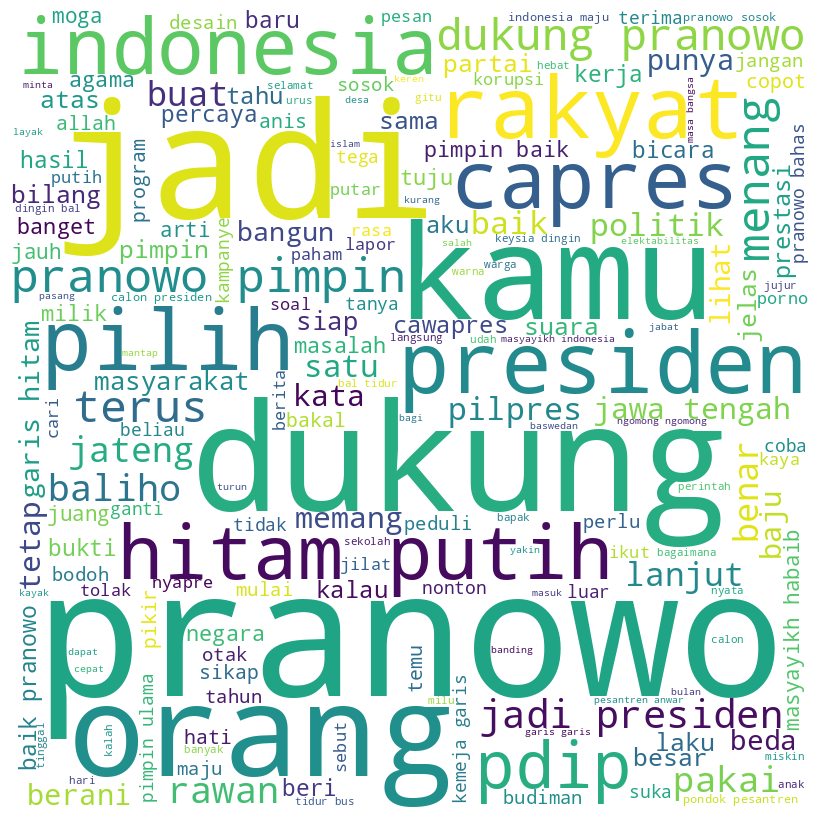

In [133]:
#Import library wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Mengambil data text yang akan dijadikan wordcloud
text = ' '.join(df['text_clean'])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Menampilkan wordcloud
plt.show()


In [134]:
# # Mendownload dataFrame
# df.to_csv('data_ganjar_600_nonNama.csv', index=False)

# from google.colab import files

# files.download('data_ganjar_600_nonNama.csv')